# CASE STUDY: Credit Card Fraud Detection System

# Mfonobong Isine

# Problem  Statement

# Import libraries

In [76]:
import pandas as pd
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(2)

# Data Exploration

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
#normalize amount column and create a new column for it
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1)) #normalize and reshape to fall within the range of -1 to 1

#drop the original amount column 
data = data.drop(['Amount'], axis = 1)

In [9]:
data.head() #notice the amount column is dropped and a normalizedAmount column is created

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [10]:
data = data.drop(['Time'], axis = 1) #drop time column as we wont be needing it

In [11]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [12]:
x = data.iloc[:, data.columns != 'Class'] #get every column into the x variable except the class column
y = data.iloc[:, data.columns == 'Class'] #assign just the class column to the y variable

In [13]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [14]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [16]:
x_train.shape

(199364, 29)

In [17]:
y_test.shape

(85443, 1)

# Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
classifier = LogisticRegression(random_state = 0) #load the classifier model

In [20]:
classifier.fit(x_train, y_train)

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [21]:
#predicting test set
y_pred = classifier.predict(x_test)

In [22]:
#analyzing our results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [23]:
acc = accuracy_score(y_test, y_pred) #accuracy score

In [24]:
prec = precision_score(y_test, y_pred) #precision score

In [25]:
rec = recall_score(y_test, y_pred) #recall

In [26]:
f1 = f1_score(y_test, y_pred) #f1 score

In [27]:
#putting the analyzed results in a tabular form
results = pd.DataFrame([['linear Regression', acc, prec, rec, f1]], columns = ['model', 'accuracy', 'precision', 'recall', 'f1 score'])

In [28]:
 results

,model,accuracy,precision,recall,f1 score
0,linear Regression,0.999204,0.883495,0.619048,0.728


# Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier #import support vector machines library

In [30]:
classifier = DecisionTreeClassifier() #load the model

In [31]:
classifier.fit(x_train, y_train) #train model

DecisionTreeClassifier()

In [32]:
#predicting test set
y_pred = classifier.predict(x_test)

In [33]:
#analyzing our results
acc = accuracy_score(y_test, y_pred) #accuracy score

In [34]:
prec = precision_score(y_test, y_pred) #precision score

In [35]:
rec = recall_score(y_test, y_pred) #recall

In [36]:
f1 = f1_score(y_test, y_pred) #f1 score

In [37]:
#putting the analyzed results in a tabular form
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]], columns = ['model', 'accuracy', 'precision', 'recall', 'f1 score'])

In [38]:
#appending the results to the previous model table
results = results.append(model_results, ignore_index = True) 

In [39]:
results

,model,accuracy,precision,recall,f1 score
0,linear Regression,0.999204,0.883495,0.619048,0.728000
1,Decision Tree,0.999298,0.827068,0.748299,0.785714


# Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier #import random forest classifier

In [41]:
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy') #load the model

In [42]:
classifier.fit(x_train, y_train)

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', random_state=0)

In [43]:
#predicting test set
y_pred = classifier.predict(x_test)

In [44]:
#analyzing our results
acc = accuracy_score(y_test, y_pred) #accuracy score

In [45]:
prec = precision_score(y_test, y_pred) #precision score

In [46]:
rec = recall_score(y_test, y_pred) #recall

In [47]:
f1 = f1_score(y_test, y_pred) #f1 score

In [48]:
#putting the analyzed results in a tabular form
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]], columns = ['model', 'accuracy', 'precision', 'recall', 'f1 score'])

In [49]:
#appending the results to the previous model table
results = results.append(model_results, ignore_index = True) 

In [50]:
results

,model,accuracy,precision,recall,f1 score
0,linear Regression,0.999204,0.883495,0.619048,0.728000
1,Decision Tree,0.999298,0.827068,0.748299,0.785714
2,Random Forest,0.999520,0.941667,0.768707,0.846442


# Support Vector Machines(SVM) Model

In [51]:
from sklearn.svm import SVC #import svm model

In [52]:
classifier = SVC() #loading our model

In [53]:
classifier.fit(x_train, y_train) #train model

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [54]:
#predicting test set
y_pred = classifier.predict(x_test)

In [55]:
#analyzing our results
acc = accuracy_score(y_test, y_pred) #accuracy score

In [56]:
prec = precision_score(y_test, y_pred) #precision score

In [57]:
rec = recall_score(y_test, y_pred) #recall

In [58]:
f1 = f1_score(y_test, y_pred) #f1 score

In [59]:
#putting the analyzed results in a tabular form
model_results = pd.DataFrame([['SVM', acc, prec, rec, f1]], columns = ['model', 'accuracy', 'precision', 'recall', 'f1 score'])

In [60]:
#appending the results to the previous model table
results = results.append(model_results, ignore_index = True) 

In [61]:
results

,model,accuracy,precision,recall,f1 score
0,linear Regression,0.999204,0.883495,0.619048,0.728000
1,Decision Tree,0.999298,0.827068,0.748299,0.785714
2,Random Forest,0.999520,0.941667,0.768707,0.846442
3,SVM,0.999345,0.950495,0.653061,0.774194


# Model Performance

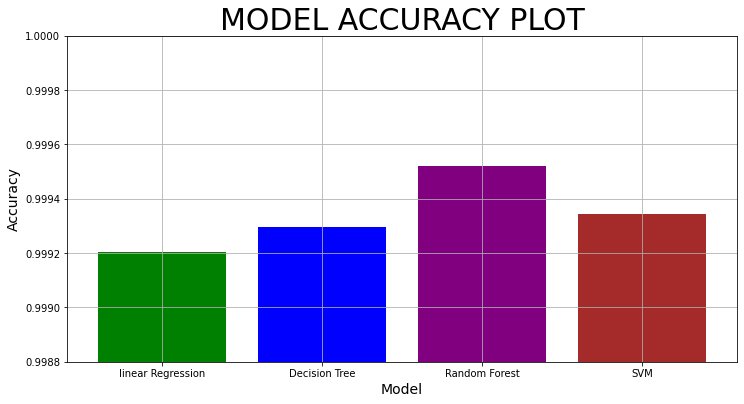

In [148]:
#ACCURACY PLOT
plt.figure(figsize = (12, 6)) #resize plot
New_Colors = ['green','blue','purple','brown'] #USE DIFFERENT COLORS FOR BARS
ax = plt.gca()
plt.ylim(0.998800, 1) #RESCALE Y-AXIS
plt.bar(results['model'], results['accuracy'], color=New_Colors)
plt.title('MODEL ACCURACY PLOT', fontsize=30) #set title
plt.xlabel('Model', fontsize=14) #set x axis label
plt.ylabel('Accuracy', fontsize=14) #set y axis label
plt.grid(True) #display grid lines
plt.show()

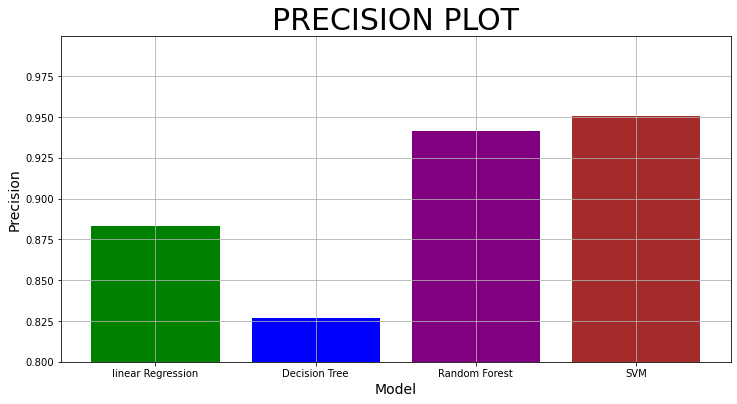

In [147]:
#PRECISION PLOT

plt.figure(figsize = (12, 6)) #resize plot
New_Colors = ['green','blue','purple','brown'] #USE DIFFERENT COLORS FOR BARS
ax = plt.gca()
plt.ylim(0.80000, 0.99999) #RESCALE Y-AXIS
plt.bar(results['model'], results['precision'], color=New_Colors)
plt.title('PRECISION PLOT', fontsize=30) #set title
plt.xlabel('Model', fontsize=14) #set x axis label
plt.ylabel('Precision', fontsize=14) #set y axis label
plt.grid(True) #display grid lines
plt.show()

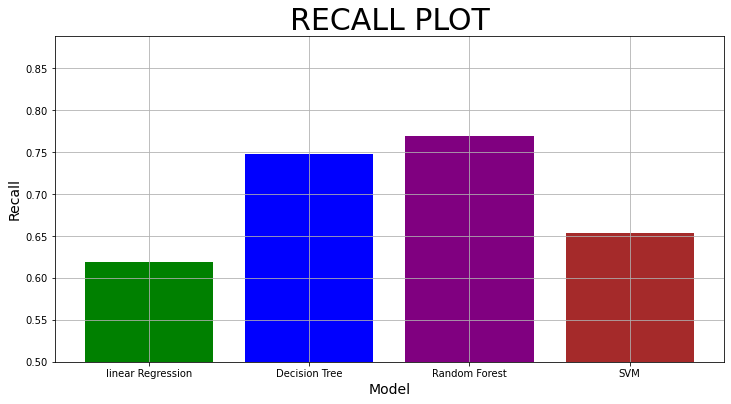

In [146]:
#RECALL PLOT

plt.figure(figsize = (12, 6)) #resize plot
New_Colors = ['green','blue','purple','brown'] #USE DIFFERENT COLORS FOR BARS
ax = plt.gca()
plt.ylim(0.50000, 0.8888) #RESCALE Y-AXIS
plt.bar(results['model'], results['recall'], color=New_Colors)
plt.title('RECALL PLOT', fontsize=30) #set title
plt.xlabel('Model', fontsize=14) #set x axis label
plt.ylabel('Recall', fontsize=14) #set y axis label
plt.grid(True) #display grid lines
plt.show()

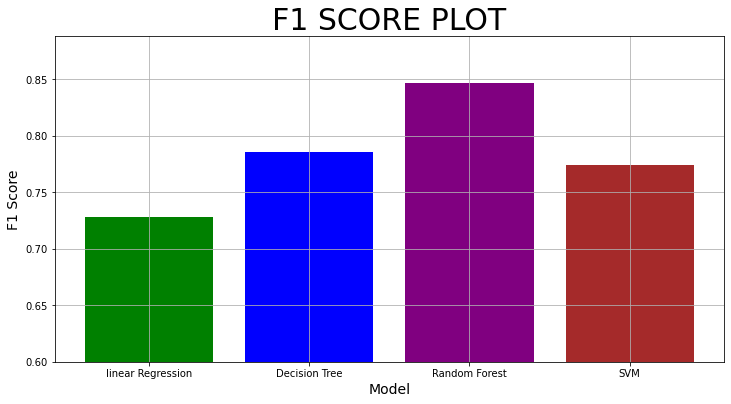

In [145]:
#F1 SCORE PLOT

plt.figure(figsize = (12, 6)) #resize plot
New_Colors = ['green','blue','purple','brown'] #USE DIFFERENT COLORS FOR BARS
ax = plt.gca()
plt.ylim(0.60000, 0.8888) #RESCALE Y-AXIS
plt.bar(results['model'], results['f1 score'], color=New_Colors)
plt.title('F1 SCORE PLOT', fontsize=30) #set title
plt.xlabel('Model', fontsize=14) #set x axis label
plt.ylabel('F1 Score', fontsize=14) #set y axis label
plt.grid(True) #display grid lines
plt.show()